In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu124'

Create a straight line dataset using the linear regression formula (weight * X + bias).

    Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
    Split the data into 80% training, 20% testing.
    Plot the training and testing data so it becomes visual.


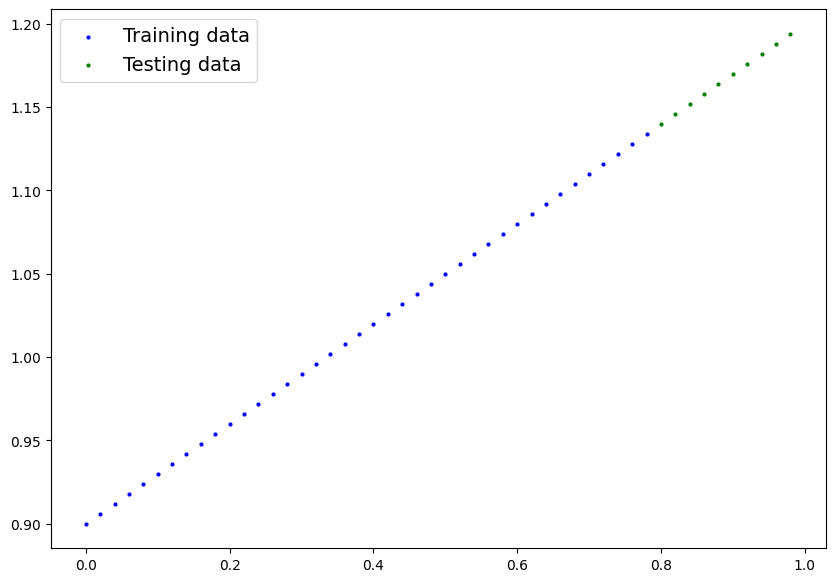

In [ ]:
weight = 0.3
bias = 0.9

#criando um loop
i = 0
j = 1
k = 0.02

#gerando os dados
X = torch.arange(i, j, k).unsqueeze(dim=1)
Y = weight*X+bias

#Splitar os dados
train_split = int(0.8*len(X))
x_train, y_train=X[:train_split],Y[:train_split]
x_test, y_test=X[train_split:],Y[train_split:]

def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     test_predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if test_predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, test_predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});
plot_predictions(x_train, y_train, x_test, y_test)

Build a PyTorch model by subclassing nn.Module.

    Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
    Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
    Once you've constructed the model, make an instance of it and check its state_dict().
    Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.


In [ ]:
#criando o modelo
class LinearRegressionModel(nn.Module):
  def __init__(self):
     super().__init__()
     self.linear_layer = nn.Linear(in_features=1,
                                   out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor: # Corrected method name to 'forward'
     return self.linear_layer(x) # Using nn.Linear for the forward pass

torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1, model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

    Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
    Write a training loop to perform the appropriate training steps for 300 epochs.
    The training loop should test the model on the test dataset every 20 epochs.

In [ ]:
#Criar a função de perda
#Começar o treinamento
loss_fn = nn.L1Loss()

#Criar o otimizador
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

epochs = 1000

for epoch in range(epochs):
  model_1.train()

  #Foward pass
  y_pred = model_1(x_train)

  #Função perda
  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  #Backwards
  loss.backward()

  optimizer.step()

  #Teste
  model_1.eval()
  #Foward pass
  with torch.inference_mode():
    test_pred = model_1(x_test)
    test_loss = loss_fn(test_pred, y_test)

Make predictions with the trained model on the test data.

    Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).


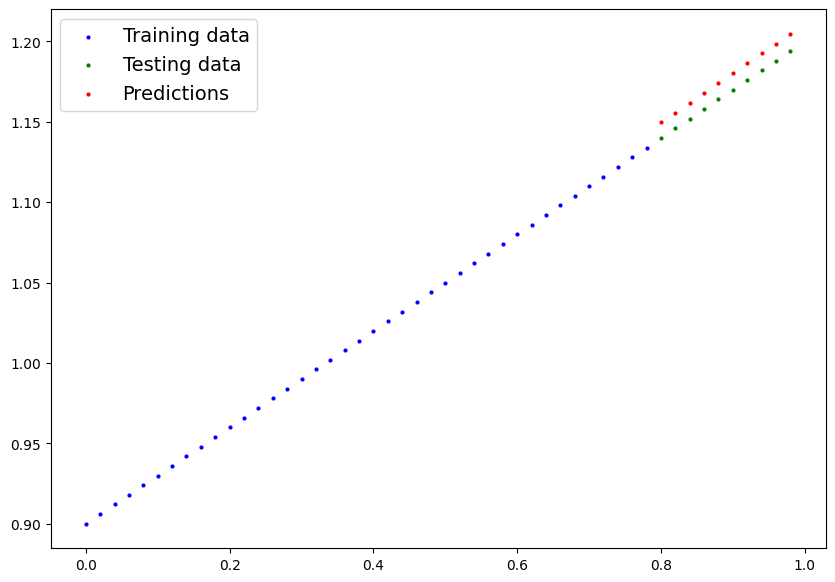

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_pred = model_1(x_test)
y_pred

plot_predictions(test_predictions=y_pred)

In [ ]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.3064]])),
             ('linear_layer.bias', tensor([0.9045]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


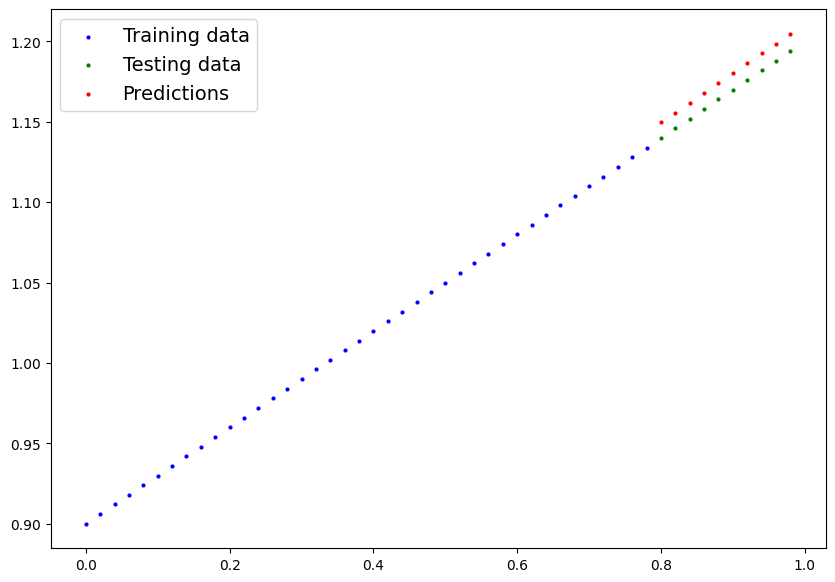

In [ ]:
with torch.inference_mode():
    test_predictions = model_1(x_test)

# Plot the predictions against the original data
plot_predictions(test_predictions=test_predictions)

Save your trained model's state_dict() to file.

    Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
    Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.


In [ ]:
from pathlib import Path

#Criando o diretório
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#Criando o caminho
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#Salvando o modelo
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# 1. Put the loaded model into evaluation mode
model_1.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    y_pred = model_1(x_test) # perform a forward pass on the test data with the loaded model

# Compare previous model predictions with loaded model predictions (these should be the same)
y_pred == loaded_model_preds

Saving model to: models/01_pytorch_workflow_model.pth


<ipython-input-76-4ab1e86c9535>:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])